## Обробка та аналіз біомедичних даних
### БС-24
### Манзик Максим
## Лабораторна робота №2

## Завдання 1
1. Згенеруємо випадковий набір даних, що будуть розподілені за нормальним законом розподілу (задаємо такі параметри як математичне сподівання та дисперсію)

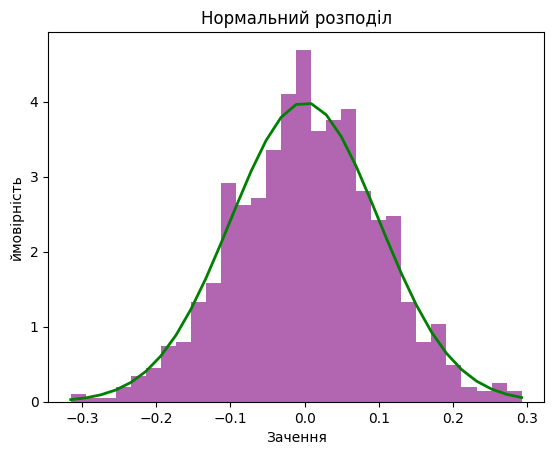

In [17]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(s, 30, density=True, alpha=0.6, color='purple')

plt.plot(
    bins,
    1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu) ** 2 / (2 * sigma ** 2)),
    linewidth=2,
    color='g'
)
plt.title('Нормальний розподіл')
plt.xlabel('Зачення')
plt.ylabel('ймовірність')
plt.show()

2. Згенеруємо випадковий набір даних, що буде розподілений рівномірно на проміжку від 0 до 1

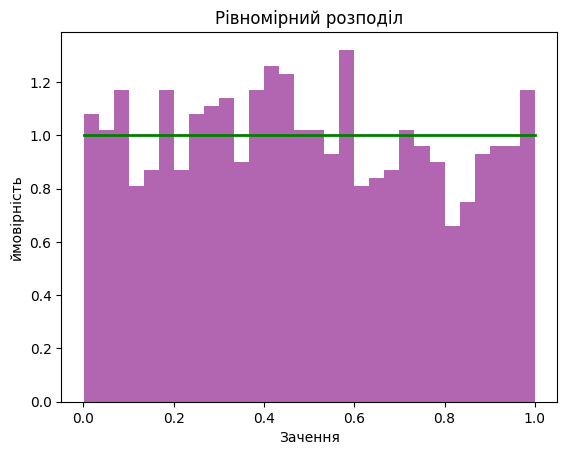

In [18]:
a, b = 0, 1
s_uniform = np.random.uniform(a, b, 1000)

count, bins, ignored = plt.hist(s_uniform, 30, density=True, alpha=0.6, color='purple')
plt.plot(bins, np.ones_like(bins) / (b - a), linewidth=2, color='g')
plt.title('Рівномірний розподіл')
plt.xlabel('Зачення')
plt.ylabel('ймовірність')
plt.show()

3. Згенеруємо випадковий набір даних, що матиме експоненційний розподіл з параметром 1 (середня кількість подій на одиницю часу)

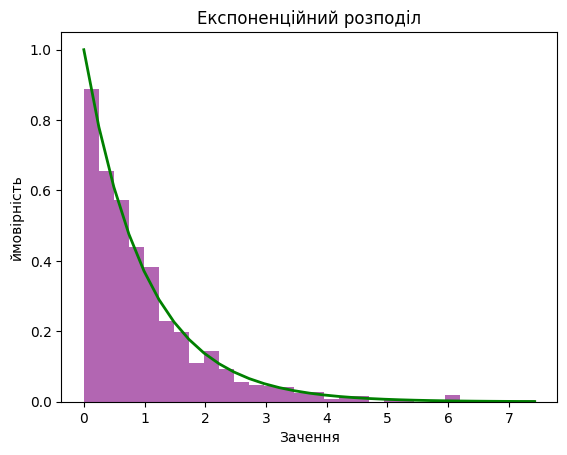

In [19]:
lambda_param = 1.0
s_exp = np.random.exponential(1 / lambda_param, 1000)

count, bins, ignored = plt.hist(s_exp, 30, density=True, alpha=0.6, color='purple')
plt.plot(bins, lambda_param * np.exp(-lambda_param * bins), linewidth=2, color='g')
plt.title('Експоненційний розподіл')
plt.xlabel('Зачення')
plt.ylabel('ймовірність')
plt.show()

4. Згенеруємо випадкові дані, що будуть розподілені за законом Пуассона з параметром 5 (середня кількість подій за інтервал часу)

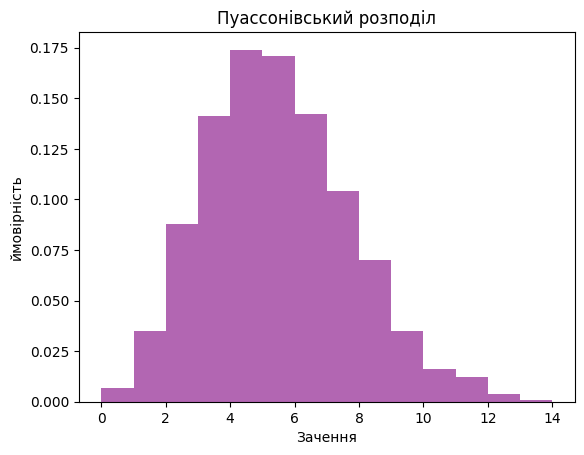

In [20]:
lambda_param_poisson = 5
s_poisson = np.random.poisson(lambda_param_poisson, 1000)

plt.hist(s_poisson, bins=range(min(s_poisson), max(s_poisson) + 1, 1),
         density=True, alpha=0.6, color='purple')
plt.title('Пуассонівський розподіл')
plt.xlabel('Зачення')
plt.ylabel('ймовірність')
plt.show()

5. Знегеруємо випадковий набір даних, що розподілені біноміально (для 100 випробувань з ймовірністю успіху 0.2)

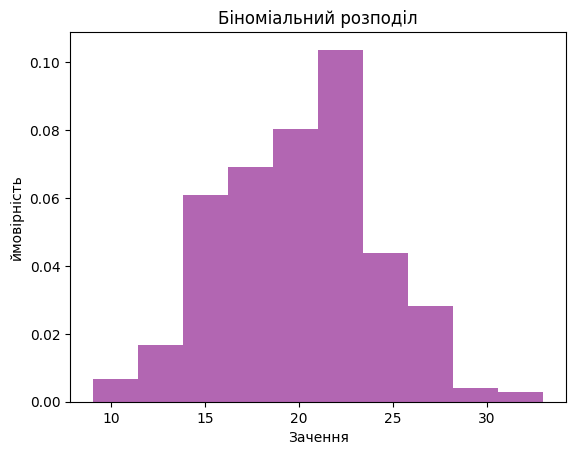

In [21]:
n = 100
p = 0.2
s_binom = np.random.binomial(n, p, size=1000)
plt.hist(s_binom, density=True, alpha=0.6, color='purple')

plt.title('Біноміальний розподіл')
plt.xlabel('Зачення')
plt.ylabel('ймовірність')
plt.show()

## Завдання 2
### 1)
Гіпотеза H0 - дані вибірки s розподілені за нормальним законом розподілу

Гіпотеза Н1 - дані вибірки s розподілені не за нормальним законом розподілу

Використаємо тест Шапіро-Вілка

In [22]:
from scipy import stats

In [23]:
statistic, p_value = stats.shapiro(s)

print(f'Статистика: {statistic}')
print(f'P значення: {p_value}')

Статистика: 0.9990989565849304
P значення: 0.9191677570343018


Отримали доволі велике значення статистики тесту, що показує на скільки добре дані відповідають нормальному розподілу, а також досягнутий рівень значущості більший за критичний рівень значущості (0,05), отже ми не відкидаємо нульову гіпотезу. 

### 2)
Гіпотеза H0 - дані вибірки s_uniform розподілені за нормальним законом розподілу
Гіпотеза Н1 - дані вибірки s_uniform розподілені не за нормальним законом розподілу
Використаємо тест Шапіро-Вілка

In [24]:
statistic, p_value = stats.shapiro(s_uniform)

print(f'Статистика: {statistic}')
print(f'P значення: {p_value}')

Статистика: 0.9592439532279968
P значення: 4.488500114696646e-16


Отримали досягнутий рівень значущості критерія менший за критичне значення (0.05) отже ми можемо відкинути нульову гіпотезу, і зробити висновок, що дані розподілені не за нормальним законом.

### 3)
Гіпотеза H0 - дані вибірки s_exp розподілені за нормальним законом розподілу
Гіпотеза Н1 - дані вибірки s_exp розподілені не за нормальним законом розподілу
Використаємо тест Шапіро-Вілка

In [25]:
statistic, p_value = stats.shapiro(s_exp)

print(f'Статистика: {statistic}')
print(f'P значення: {p_value}')

Статистика: 0.7991796135902405
P значення: 2.0165910482203587e-33


Отримане значення досягнутого рівня значущості значно менше за критичне (0.05), отже можна відкинути нульову гіпотезу і зробити висновок, що дані з вибірки s_exp розподілені не за нормальним законом розподілу.

## Завдання 3
### 1)
Гіпотеза Н0 - дані вибірки s розподілені за нормальним законом розподілу

Гіпотеза Н1 - дані вибірки s розподілені не за нормальним законом розподілу

Використаємо тест Колмогорова-Смірнова

In [26]:
from scipy import stats

D, p_value = stats.kstest(s, 'norm', args=(0, 0.1))

print(f'Статистика: {D}')
print(f'P значення: {p_value}')

Статистика: 0.029734274641957714
P значення: 0.3330168165142461


Отримали значення досягнутого рівня значущості критерію більше за критичне (0.05), отже нульову гіпотезу, що говорить про те, що дані розподілені за нормальним законом не відкидаємо.

### 2)
Гіпотеза Н0 - дані вибірки s_uniform розподілені за рівномірним законом розподілу

Гіпотеза Н1 - дані вибірки s_uniform розподілені не за рівномірним законом розподілу

Використаємо тест Колмогорова-Смірнова

In [27]:
D, p_value = stats.kstest(s_uniform, 'uniform')

print(f'Статистика: {D}')
print(f'P значення: {p_value}')

Статистика: 0.040441459252751444
P значення: 0.0738765534670317


Отримали значення досягнутого рівня значущості критерію більше за критичне (0.05), отже нульову гіпотезу, що говорить про те, що дані розподілені рівномірно не відкидаємо.

### 3)
Гіпотеза Н0 - дані вибірки s_exp розподілені за експоненційним законом розподілу
Гіпотеза Н1 - дані вибірки s_exp розподілені не за експоненційним законом розподілу
Використаємо тест Колмогорова-Смірнова

In [28]:
D, p_value = stats.kstest(s_exp, 'expon')

print(f'Статистика: {D}')
print(f'P значення: {p_value}')

Статистика: 0.021739607141290085
P значення: 0.7234294795313299


Отримали значення досягнутого рівня значущості критерію більше за критичне (0.05), отже нульову гіпотезу не відкидаємо і можемо зробити висновок, що дані вибірки розподілені за експоненційним законом розподілу.